# The Sparks Foundation: Data Science and Business Analytics Tasks

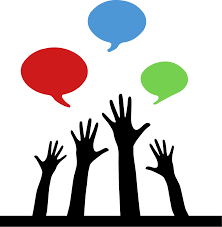

## Task 2: Prediction using Unsupervised ML

Target: From the Given Dataset, predict the optimim number of clusters and respresnt it visually

## Author : Mohamed Sherif El-Boraie 

.

### Imported Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import datasets

# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load the dataset and displaying the inputs Data

In [3]:
# Load the iris dataset
dataset = 'Iris.csv'
Data_Frame= pd.read_csv(dataset)

In [4]:
Data_Frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df = Data_Frame.copy()

In [6]:
# Remove the portion of the name 'Iris' so the species name is shorter
df['Species'] = df.Species.str.replace('Iris-', '')
# Drop the 'Id' column
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Count the occurrences of each species
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [8]:
# Print the summary statistics of the DataFrame
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Print the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Extract the input features (Sepal Length, Sepal Width, Petal Length, Petal Width)
iris = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

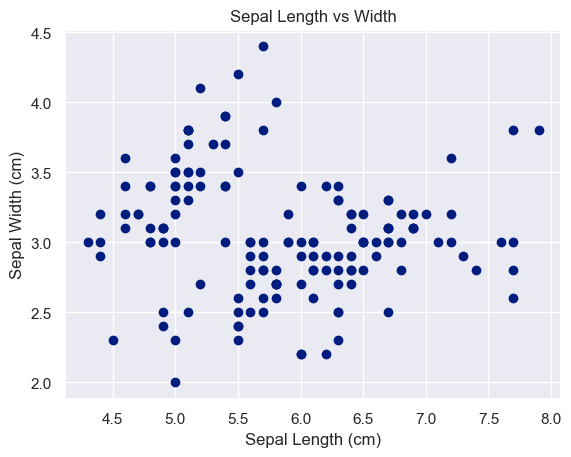

In [14]:
# Create a scatter plot of Sepal Length vs Sepal Width
ax = plt.axes()

ax.scatter(df.SepalLengthCm, df.SepalWidthCm)

ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

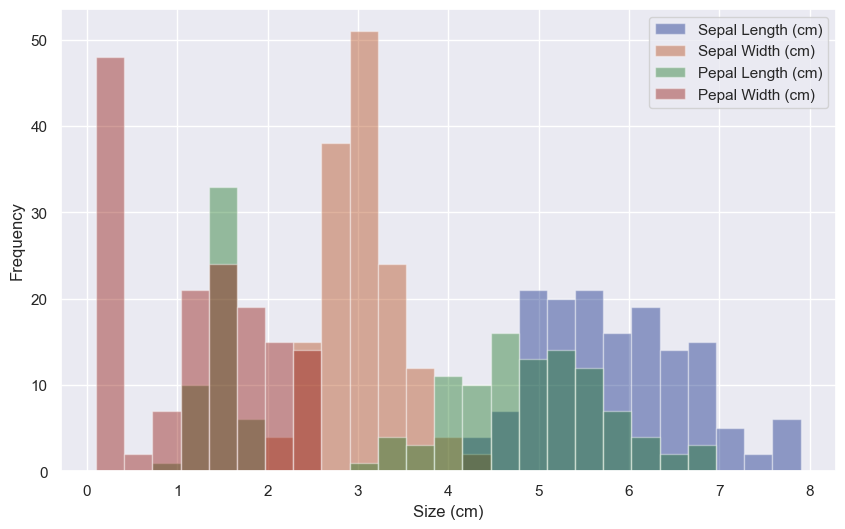

In [15]:
# Plot the distribution of the features
sns.set_context('notebook')
ax = df.plot.hist(bins=25, alpha=0.4 , figsize=(10,6))
ax.set_xlabel('Size (cm)');
plt.legend(('Sepal Length (cm)','Sepal Width (cm)','Pepal Length (cm)','Pepal Width (cm)'))

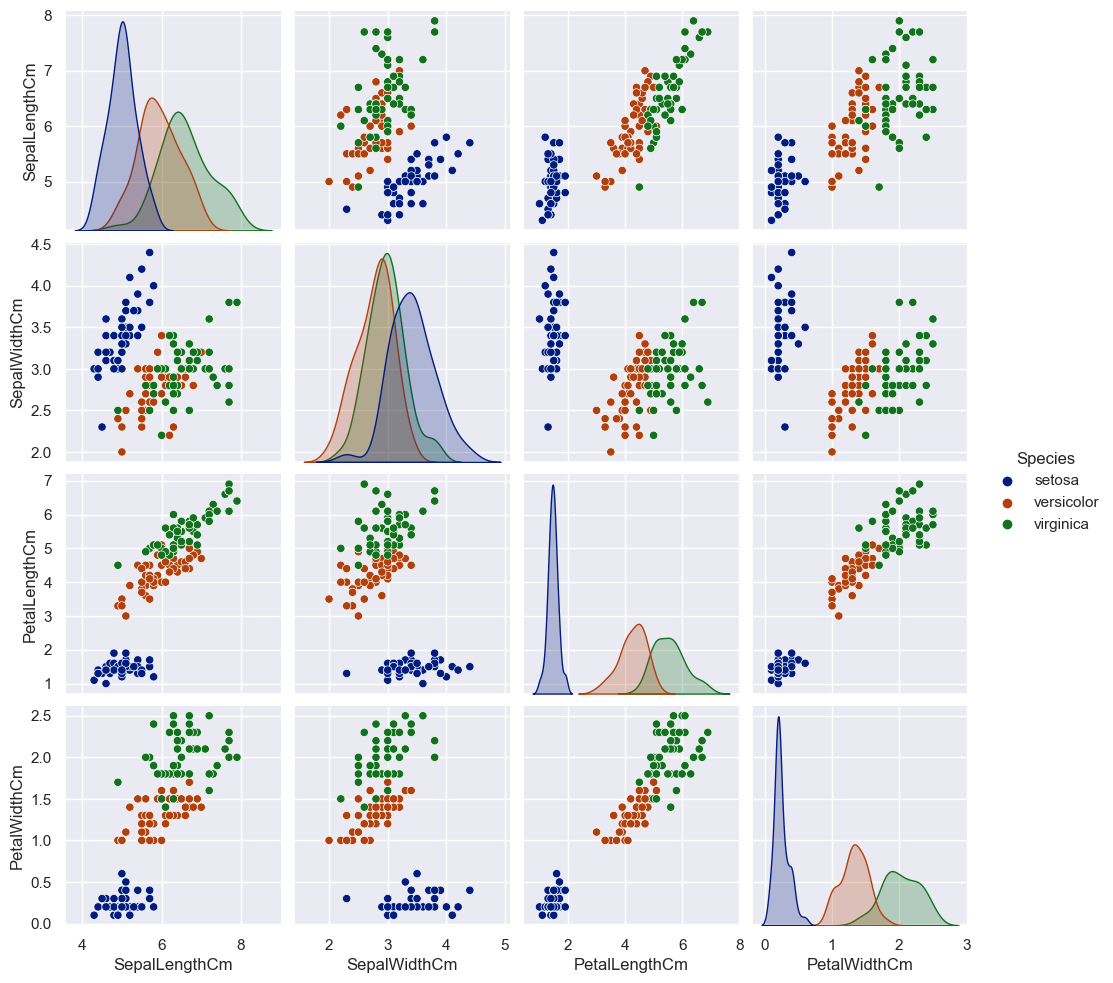

In [13]:
# Examine the correlation between each of the measurements
sns.set_context('notebook')
sns.set_palette('dark')
sns.pairplot(df, hue='Species');

### Cluster Validation applying WCSS

In [16]:
# Calculate and plot the within-cluster sum of squares (WCSS) for different values of k
wcss = []  

for k in range(1,16):
    kmeans = KMeans(n_clusters=k, random_state=365)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

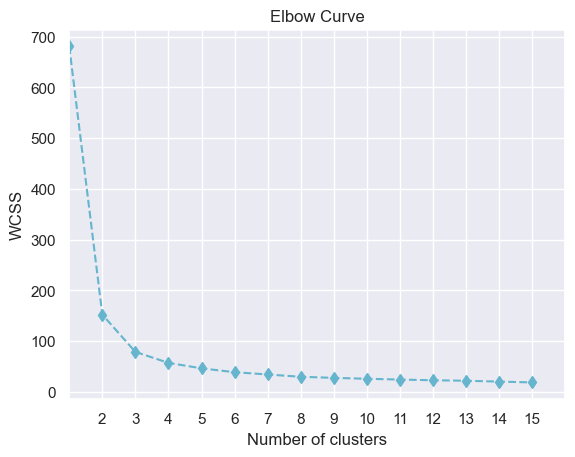

In [17]:
plt.plot(range(1, 16), wcss, "d--" , c='c')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xlim(1, 16, 2)
plt.xticks(range(2, 16, 1))
plt.title('Elbow Curve')
plt.show()

### Explore clustering solutions and select the number of clusters

In [18]:
# Create a KMeans model with 3 clusters, as it is given that Iris dataset contains 3 different species of flowers.
kmeans_new = KMeans(3)
# Fit the data
kmeans_new.fit(iris)
# Create a new data frame with the predicted clusters
y_kmeans = kmeans_new.fit_predict(iris)

In [19]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

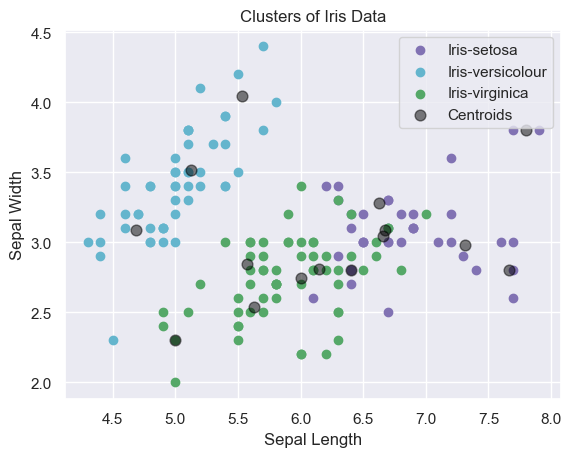

In [25]:
# Visualize the clusters on the first two columns
plt.scatter(iris[y_kmeans == 0, 0], iris[y_kmeans == 0, 1], c = 'm', label = 'Iris-setosa')
plt.scatter(iris[y_kmeans == 1, 0], iris[y_kmeans == 1, 1], c = 'c', label = 'Iris-versicolour')
plt.scatter(iris[y_kmeans == 2, 0], iris[y_kmeans == 2, 1], c = 'g', label = 'Iris-virginica')

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 60, c = 'black', label = 'Centroids',alpha=0.5)
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()